In [1]:
import pandas as pd
pd.set_option("display.max_rows",45)
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=4)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j].round(4),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot(pred_value):
    from sklearn.metrics import confusion_matrix
    cm_2labels = confusion_matrix(y_pred = pred_value, y_true = actual_value)
    plt.figure(figsize=[6,6])
    plot_confusion_matrix(cm_2labels, output_columns_2labels, normalize = True)

In [3]:
kdd_diff_level_train = pd.read_pickle("dataset/kdd_diff_level_train.pkl")
kdd_diff_level_test = pd.read_pickle("dataset/kdd_diff_level_test.pkl")
actual_value = pd.read_pickle("dataset/kdd_test_2labels_y.pkl");
output_columns_2labels = ['Normal','Attack']

In [4]:
def get_count(pred_value):
    difficulty = pd.DataFrame({"Actual":actual_value, "Predict":pred_value, "difficulty_level":kdd_diff_level_test})
    #difficulty = pd.concat(difficulty, pd.Data)
    difficulty['accuracy'] = None
    difficulty.ix[difficulty.Actual == difficulty.Predict, "accuracy"] = 'Correct'
    difficulty.ix[difficulty.Actual != difficulty.Predict, "accuracy"] = 'Incorrect'
    diff_group = difficulty.groupby(["difficulty_level", "accuracy"])
    total_correct = sum(difficulty.Actual == difficulty.Predict)
    total_records = difficulty.shape[0]
    total_incorrect = total_records - total_correct
    return diff_group.count()

In [5]:
vae_only_predictions = pd.read_pickle("dataset/vae_only_predictions.pkl")
vae_only_scores = pd.read_pickle("dataset/vae_only_scores.pkl")

In [6]:
vae_only_scores.sort_values("test_score", ascending=True)

,epoch,no_of_features,hidden_layers,train_score,test_score
11,1,1024,6,0.698707,1.786171
10,1,256,6,0.757614,1.828672
15,1,32,10,0.762060,1.835534
8,1,16,6,0.768247,1.837274
7,1,8,6,0.760923,1.845780
6,1,4,6,0.758832,1.850399
9,1,32,6,0.781125,1.859858
1,1,8,2,0.800566,1.873189
14,1,16,10,0.807379,1.896822
16,1,256,10,0.798418,1.899578


Normalized confusion matrix
[[ 0.7744  0.2256]
 [ 0.1148  0.8852]]


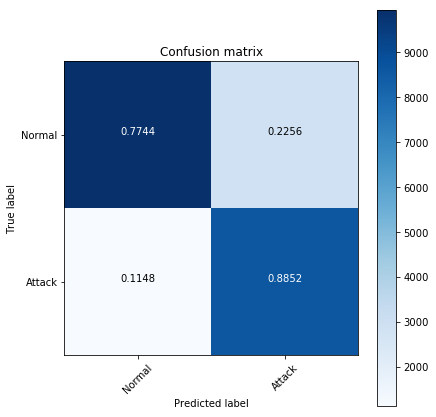

In [7]:
pred_value = vae_only_predictions["1_1024_6"]
plot(pred_value)

In [8]:
get_count(pred_value)

Actual  Predict
difficulty_level accuracy                  
0                Correct        56       56
                 Incorrect      67       67
1                Correct        36       36
                 Incorrect      51       51
2                Correct        18       18
                 Incorrect      37       37
3                Correct        26       26
                 Incorrect      90       90
4                Correct        24       24
                 Incorrect      77       77
5                Correct        28       28
                 Incorrect      75       75
6                Correct        88       88
                 Incorrect      69       69
7                Correct       171      171
                 Incorrect      78       78
8                Correct       100      100
                 Incorrect      31       31
9                Correct        70       70
                 Incorrect      36       36
10               Correct        94       94
                 Incorrect     101      101
11               Correct       195      195
                 Incorrect     266      266
12               Correct       241      241
                 Incorrect     245      245
13               Correct       294      294
                 Incorrect     225      225
14               Correct       498      498
                 Incorrect     238      238
15               Correct       804      804
                 Incorrect     372      372
16               Correct       300      300
                 Incorrect     381      381
17               Correct       532      532
                 Incorrect     636      636
18               Correct      2457     2457
                 Incorrect     510      510
19               Correct       745      745
                 Incorrect     145      145
20               Correct      1229     1229
                 Incorrect     114      114
21               Correct     10528    10528
                 Incorrect     166      166

In [9]:
#vae_only_predictions



In [10]:
vae_dense_predictions = pd.read_pickle("dataset/vae_dense_predictions.pkl")
vae_dense_scores = pd.read_pickle("dataset/vae_dense_scores.pkl")

In [11]:
vae_dense_scores.sort_values("test_score", ascending=False)

,epoch,no_of_features,hidden_layers,train_score,test_score
20,1,32,6,0.743838,0.840711
16,1,2,6,0.875769,0.839647
7,1,256,2,0.846041,0.807488
19,1,16,6,0.889165,0.783002
23,1,256,6,0.888946,0.775994
15,1,256,4,0.836952,0.753194
2,1,8,2,0.907363,0.751996
6,1,128,2,0.877396,0.737713
1,1,4,2,0.926335,0.732656
14,1,128,4,0.814348,0.724760


Normalized confusion matrix
[[ 0.9613  0.0387]
 [ 0.3186  0.6814]]


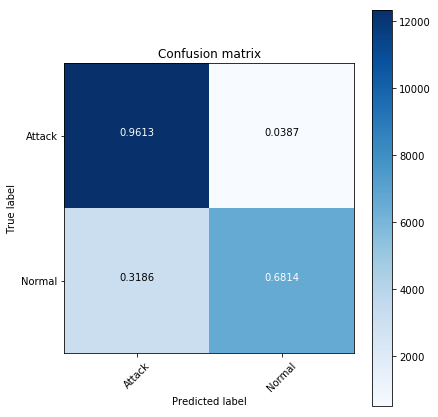

In [12]:
pred_value = vae_dense_predictions.loc[:,"1_32_6"]
output_columns_2labels = ['Attack','Normal']
plot(pred_value)

In [13]:
get_count(pred_value)
#vae_dense_predictions

Actual  Predict
difficulty_level accuracy                  
0                Correct       116      116
                 Incorrect       7        7
1                Correct        75       75
                 Incorrect      12       12
2                Correct        47       47
                 Incorrect       8        8
3                Correct        61       61
                 Incorrect      55       55
4                Correct        66       66
                 Incorrect      35       35
5                Correct        70       70
                 Incorrect      33       33
6                Correct       122      122
                 Incorrect      35       35
7                Correct       224      224
                 Incorrect      25       25
8                Correct       120      120
                 Incorrect      11       11
9                Correct        94       94
                 Incorrect      12       12
10               Correct       161      161
                 Incorrect      34       34
11               Correct       311      311
                 Incorrect     150      150
12               Correct       385      385
                 Incorrect     101      101
13               Correct       456      456
                 Incorrect      63       63
14               Correct       657      657
                 Incorrect      79       79
15               Correct      1068     1068
                 Incorrect     108      108
16               Correct       527      527
                 Incorrect     154      154
17               Correct       717      717
                 Incorrect     451      451
18               Correct      2323     2323
                 Incorrect     644      644
19               Correct       796      796
                 Incorrect      94       94
20               Correct       999      999
                 Incorrect     344      344
21               Correct      9558     9558
                 Incorrect    1136     1136

In [14]:
dense_only_predictions = pd.read_pickle("dataset/dense_only_predictions.pkl")
dense_only_scores = pd.read_pickle("dataset/dense_only_scores.pkl")

In [15]:
dense_only_scores.sort_values("test_score", ascending=False)

,epoch,no_of_features,hidden_layers,train_score,test_score
6,10,8,4,0.946034,0.754170
25,10,128,2,0.955255,0.751907
11,10,16,4,0.966501,0.747915
5,10,8,2,0.918104,0.738556
15,10,32,2,0.959052,0.731281
17,10,32,6,0.962942,0.727910
21,10,64,4,0.966316,0.727644
20,10,64,2,0.963630,0.727511
30,10,256,2,0.969332,0.724317
0,10,4,2,0.889567,0.722276


Normalized confusion matrix
[[ 0.6195  0.3805]
 [ 0.073   0.927 ]]


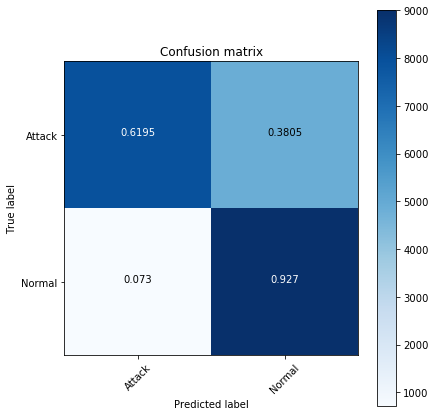

In [16]:
pred_value = dense_only_predictions.loc[:,"10_8_4"]

plot(pred_value)

In [17]:
get_count(pred_value)
#dense_only_predictions

Actual  Predict
difficulty_level accuracy                  
0                Correct         5        5
                 Incorrect     118      118
1                Correct         1        1
                 Incorrect      86       86
2                Correct         1        1
                 Incorrect      54       54
3                Correct         4        4
                 Incorrect     112      112
4                Correct         8        8
                 Incorrect      93       93
5                Correct        21       21
                 Incorrect      82       82
6                Correct        30       30
                 Incorrect     127      127
7                Correct        32       32
                 Incorrect     217      217
8                Correct        54       54
                 Incorrect      77       77
9                Correct        20       20
                 Incorrect      86       86
10               Correct        35       35
                 Incorrect     160      160
11               Correct        47       47
                 Incorrect     414      414
12               Correct       103      103
                 Incorrect     383      383
13               Correct       185      185
                 Incorrect     334      334
14               Correct       277      277
                 Incorrect     459      459
15               Correct       367      367
                 Incorrect     809      809
16               Correct       245      245
                 Incorrect     436      436
17               Correct       523      523
                 Incorrect     645      645
18               Correct      2334     2334
                 Incorrect     633      633
19               Correct       730      730
                 Incorrect     160      160
20               Correct      1294     1294
                 Incorrect      49       49
21               Correct     10636    10636
                 Incorrect      58       58